<a href="https://colab.research.google.com/github/Aanyajain/Tensorflow/blob/master/Sentiment_Anlaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Jul  9 14:36:15 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip uninstall tensorflow


Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0


In [ ]:
from __future__ import absolute_import,division,print_function,unicode_literals
try:
  !pip uninstall tb-nightly tensorboardX tensorboard
  !pip install tf-nightly
except Exception:
  pass

import tensorflow as tf
import os
import datetime
import tensorflow_datasets as tfds
%load_ext tensorboard

Uninstalling tensorboard-2.2.2:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.6/dist-packages/tensorboard-2.2.2.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorboard/*
Proceed (y/n)? y
  Successfully uninstalled tensorboard-2.2.2
     |████████████████████████████████| 322.7MB 53kB/s 
     |████████████████████████████████| 6.5MB 46.9MB/s 
     |████████████████████████████████| 460kB 53.7MB/s 


In [ ]:
import pkg_resources
for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins'):
  print(entry_point.dist)

tensorboard 2.2.2
tensorboard-plugin-wit 1.6.0.post3


In [ ]:
!rm -r /usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info

In [ ]:
print(tf.__version__)

2.4.0-dev20200709


In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
dataset,info=tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00',with_info=True)
train_dataset=dataset['train']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incompleteWIWVLR/amazon_us_reviews-train.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [ ]:
print(train_dataset)

<DatasetV1Adapter shapes: {data: {customer_id: (), helpful_votes: (), marketplace: (), product_category: (), product_id: (), product_parent: (), product_title: (), review_body: (), review_date: (), review_headline: (), review_id: (), star_rating: (), total_votes: (), verified_purchase: (), vine: ()}}, types: {data: {customer_id: tf.string, helpful_votes: tf.int32, marketplace: tf.string, product_category: tf.string, product_id: tf.string, product_parent: tf.string, product_title: tf.string, review_body: tf.string, review_date: tf.string, review_headline: tf.string, review_id: tf.string, star_rating: tf.int32, total_votes: tf.int32, verified_purchase: tf.int64, vine: tf.int64}}>


In [ ]:
len(list(train_dataset))

104975

In [ ]:
BUFFER_SIZE=30000
BATCH_SIZE=128

In [ ]:
train_dataset=train_dataset.shuffle(BUFFER_SIZE,reshuffle_each_iteration=False)


In [ ]:
for reviews in train_dataset.take(2):
  print(reviews)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'31760197'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B003H92LGW'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'593844085'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'SecureHOLD GPS Auto Dash Friction Mount - Removable - Mount and Protect your GPS on the Dashboard of your Car Without Adhesive!'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b'I bought this gps holder in 2010 and it looks nothing like the picture that is there now (2013), so maybe they have updated the model.  The one we have used to hold in place on the dashboard, but now the friction is much less stong and it slides around quite a bit when braking. Also, there are a lot of adju

In [ ]:
for reviews in train_dataset.take(10):
  review_text=reviews['data']
  print(review_text.get('review_body').numpy())
  print(review_text.get('star_rating'))
  print(tf.where(review_text.get('star_rating')>3,1,0).numpy())

b'I bought this gps holder in 2010 and it looks nothing like the picture that is there now (2013), so maybe they have updated the model.  The one we have used to hold in place on the dashboard, but now the friction is much less stong and it slides around quite a bit when braking. Also, there are a lot of adjustable parts that have not held up well.'
tf.Tensor(2, shape=(), dtype=int32)
0
b'Great sound in small rooms. Battery life is no where near what is advertised. But great bang for the buck.'
tf.Tensor(5, shape=(), dtype=int32)
1
b"Very easy to use and the sound is very clear.  I didn't even have to put my cell phone as close as the Bluetooth suggested.<br />I received it very promptly."
tf.Tensor(5, shape=(), dtype=int32)
1
b'Works great for a classroom!!  Wish I could find another one! Great sound quality and loud enough for the back of the room to hear'
tf.Tensor(5, shape=(), dtype=int32)
1
b'The case is large enough to carry the speaker and the recharger cable.  The quality appea

In [ ]:
tokenizer=tfds.features.text.Tokenizer()
vocabulary_set=set()
for _,reviews in train_dataset.enumerate():
  review_text=reviews['data']
  reviews_tokens=tokenizer.tokenize(review_text.get('review_body').numpy())
  vocabulary_set.update(reviews_tokens)

vocab_size=len(vocabulary_set)
vocab_size

73738

In [ ]:
encoder=tfds.features.text.TokenTextEncoder(vocabulary_set)

In [ ]:
print(vocabulary_set)

{'flicker', 'pinball', '20203R79902', 'U87', 'T7A', 'EeePad', 'legally', 'spectral', 'KINDLE', 'Spaceship', 'uke', 'RD', 'disgust', 'diffused', 'southwest', 'Motors', 'stateside', 'TomTom920', 'verbose', 'overated', 'Dought', 'FI', 'finickier', 'integrated', 'Supertuner', 'radiates', 'Cleanup', 'righhting', 'prs', 'prograsmming', 'TrakteQ', 'KNOWING', 'dosnt', 'meter', 'transition', 'Extension', 'teflon', 'sunbathing', 'detractor', 'Distressed', 'diminishes', 'wasent', 'complainty', 'flyer', 'sincing', 'reexamine', 'BootCamp', 'QuickTime', 'Mivizi', 'passangers', 'oblique', 'SIM', 'MSU', 'utlized', 'refection', 'DEFINATELY', 'Kloss', '1300LM', 'centered', 'responsibilty', 'airbubbles', '1960s', '597', 'anytHing', 'Kids', 'MAXX', 'burglar', 'Tasty', 'DIFFERENCE', 'convertable', 'easy', 'dressed', 'Thunder421D', 'usuallyall', 'comin', 'blunting', 'anacronism', '10VC122', 'PICKIT', 'nears', 'Vktech', 'polished', 'SAS', 'subchannels', '60csx', 'PIONIER', 'Coolest', 'Yippee', 'Crocodil', 't

In [ ]:
print(encoder)

<TokenTextEncoder vocab_size=73740>


In [ ]:
for reviews in train_dataset.take(5):
  review_text=reviews['data']
  print(review_text.get('review_body').numpy())
  encoded_example=encoder.encode(review_text.get('review_body').numpy())
  print(encoded_example)

b'I bought this gps holder in 2010 and it looks nothing like the picture that is there now (2013), so maybe they have updated the model.  The one we have used to hold in place on the dashboard, but now the friction is much less stong and it slides around quite a bit when braking. Also, there are a lot of adjustable parts that have not held up well.'
[44113, 10042, 44370, 62948, 63898, 13417, 38093, 73168, 23883, 67996, 21061, 14749, 16640, 24399, 64492, 43948, 29019, 34869, 66726, 29703, 29088, 45979, 24186, 24627, 16640, 42492, 70817, 36539, 57753, 24186, 28176, 6316, 60149, 13417, 72802, 33342, 16640, 2097, 19686, 34869, 16640, 10565, 43948, 36923, 26586, 29952, 73168, 23883, 70245, 40115, 7478, 69619, 46657, 72492, 27425, 62736, 29019, 70281, 69619, 20278, 41963, 43701, 57595, 64492, 24186, 64003, 40045, 65989, 51731]
b'Great sound in small rooms. Battery life is no where near what is advertised. But great bang for the buck.'
[44069, 30079, 13417, 40289, 41714, 57610, 70680, 43948, 

In [ ]:
for i in encoded_example:
  print('{}--->{}'.format(i,encoder.decode([i])))

70817--->The
19074--->case
43948--->is
58254--->large
27724--->enough
6316--->to
11210--->carry
16640--->the
57981--->speaker
73168--->and
16640--->the
52092--->recharger
6333--->cable
70817--->The
37235--->quality
43651--->appears
6316--->to
58139--->be
11246--->excellent
73168--->and
23883--->it
67996--->looks
14749--->like
23883--->it
56572--->will
60149--->hold
65989--->up


In [ ]:
def encode(text_tensor,label_tensor):
  encoded_text=encoder.encode(text_tensor.numpy())
  label=tf.where(label_tensor>3,1,0)
  return encoded_text,label

In [ ]:
def encode_map_fn(tensor):
  text=tensor['data'].get('review_body')
  label=tensor['data'].get('star_rating')
  encoded_text,label=tf.py_function(encode,inp=[text,label],Tout=(tf.int64,tf.int32))

  encoded_text.set_shape([None])
  label.set_shape([])
  return encoded_text,label

In [ ]:
ar_encoded_data=train_dataset.map(encode_map_fn)

In [ ]:
for f0,f1 in ar_encoded_data.take(2):
  print(f0)
  print(f1)

tf.Tensor(
[44113 10042 44370 62948 63898 13417 38093 73168 23883 67996 21061 14749
 16640 24399 64492 43948 29019 34869 66726 29703 29088 45979 24186 24627
 16640 42492 70817 36539 57753 24186 28176  6316 60149 13417 72802 33342
 16640  2097 19686 34869 16640 10565 43948 36923 26586 29952 73168 23883
 70245 40115  7478 69619 46657 72492 27425 62736 29019 70281 69619 20278
 41963 43701 57595 64492 24186 64003 40045 65989 51731], shape=(69,), dtype=int64)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(
[44069 30079 13417 40289 41714 57610 70680 43948 20928 54331 28708 71057
 43948 16724 12426 42269 24917 34517 16640 58101], shape=(20,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
TAKE_SIZE=10000
train_data=ar_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data=train_data.padded_batch(BATCH_SIZE)

test_data=ar_encoded_data.take(TAKE_SIZE)
test_data=test_data.padded_batch(BATCH_SIZE)

In [ ]:
vocab_size += 1

In [ ]:
sample_text,sample_labels=next(iter(test_data))
sample_text[1],sample_labels[1]

(<tf.Tensor: shape=(285,), dtype=int64, numpy=
 array([44069, 30079, 13417, 40289, 41714, 57610, 70680, 43948, 20928,
        54331, 28708, 71057, 43948, 16724, 12426, 42269, 24917, 34517,
        16640, 58101,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,  

In [ ]:
for f0,f1 in test_data.take(10):
  print(tf.unique_with_counts(f1)[2].numpy())

[38 90]
[87 41]
[34 94]
[48 80]
[83 45]
[92 36]
[39 89]
[79 49]
[74 54]
[80 48]


In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size,128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
for units in [64,64]:
  model.add(tf.keras.layers.Dense(units,activation='relu'))

model.add(tf.keras.layers.Dense(1))

In [ ]:
!rm -r /tmp/logs/

rm: cannot remove '/tmp/logs/': No such file or directory


In [ ]:
logdir=os.path.join("/tmp/logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback=tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
checkpointer=tf.keras.callbacks.ModelCheckpoint(filepath='sentiment_analysis.hdf5',verbose=1,save_best_only=True)

model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
pwd

'/content/drive/My Drive/Colab Notebooks/NLP'

In [ ]:
history=model.fit(train_data,epochs=4,validation_data=test_data,callbacks=[tensorboard_callback,checkpointer])

Epoch 1/4
      2/Unknown - 2s 946ms/step - loss: 0.1026 - accuracy: 0.9727WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.4994s vs `on_train_batch_end` time: 1.3681s). Check your callbacks.


    742/Unknown - 246s 332ms/step - loss: 0.1179 - accuracy: 0.9554
Epoch 00001: val_loss improved from inf to 0.32744, saving model to sentiment_analysis.hdf5
742/742 [==============================] - 264s 355ms/step - loss: 0.1179 - accuracy: 0.9554 - val_loss: 0.3274 - val_accuracy: 0.8806
Epoch 2/4
742/742 [==============================] - ETA: 0s - loss: 0.0955 - accuracy: 0.9649
Epoch 00002: val_loss did not improve from 0.32744
742/742 [==============================] - 263s 354ms/step - loss: 0.0955 - accuracy: 0.9649 - val_loss: 0.3543 - val_accuracy: 0.8780
Epoch 3/4
742/742 [==============================] - ETA: 0s - loss: 0.0787 - accuracy: 0.9718
Epoch 00003: val_loss did not improve from 0.32744
742/742 [==============================] - 263s 354ms/step - loss: 0.0787 - accuracy: 0.9718 - val_loss: 0.4582 - val_accuracy: 0.8748
Epoch 4/4
742/742 [==============================] - ETA: 0s - loss: 0.0663 - accuracy: 0.9765
Epoch 00004: val_loss did not improve from 0.327

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/NLP

/content/drive/My Drive/Colab Notebooks/NLP


In [ ]:
pwd

'/content/drive/My Drive/Colab Notebooks/NLP'

In [ ]:
model.save('final_sentiment_model.hdf5')

In [ ]:
!ls -alrt /tmp/*.hdf5

-rw-r--r-- 1 root root 118632960 Jul 10 06:18 /tmp/sentiment_analysis.hdf5


In [ ]:
eval_loss,eval_acc=model.evaluate(test_data)
print('\n eval loss: {:.3f},eval_accuracy: {:.3f}'.format(eval_loss,eval_acc))

79/79 [==============================] - 16s 202ms/step - loss: 0.5213 - accuracy: 0.8786

 eval loss: 0.521,eval_accuracy: 0.879


In [ ]:
for f0,f1 in test_data.take(1):
  print(f1)
  print(model.predict(f0))

tf.Tensor(
[0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1
 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1], shape=(128,), dtype=int32)
[[-6.031421  ]
 [ 3.9928129 ]
 [ 6.911368  ]
 [ 6.7655354 ]
 [ 7.3282022 ]
 [ 2.6963458 ]
 [ 0.77787405]
 [ 7.3429823 ]
 [ 7.8340917 ]
 [ 7.8916636 ]
 [ 7.5877504 ]
 [ 7.932313  ]
 [-6.9982815 ]
 [-7.3815413 ]
 [ 7.8516884 ]
 [ 7.414279  ]
 [ 7.994809  ]
 [ 8.016121  ]
 [ 7.046863  ]
 [ 6.765132  ]
 [ 8.0295725 ]
 [ 2.6227815 ]
 [ 3.2344549 ]
 [ 8.043935  ]
 [ 6.600843  ]
 [ 2.093044  ]
 [-3.4566054 ]
 [-6.9538198 ]
 [ 6.630157  ]
 [ 0.8916733 ]
 [-2.7922738 ]
 [-4.4091797 ]
 [-6.967172  ]
 [ 7.9213123 ]
 [ 7.4273596 ]
 [-7.0390754 ]
 [ 5.461989  ]
 [-0.5534319 ]
 [ 8.174963  ]
 [ 7.670411  ]
 [ 5.6632214 ]
 [ 1.6380055 ]
 [ 8.071953  ]
 [-6.3736877 ]
 [-1.4580702 ]
 [ 6.2917886 ]
 [ 8.01683

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         9438592   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         263168    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,878,593
Trainable params: 9,878,593
Non-trainable params: 0
______________________________________________

In [ ]:
model.get_layer('embedding').output

<tf.Tensor 'embedding/embedding_lookup/Identity_1:0' shape=(None, None, 128) dtype=float32>

In [ ]:
!nvidia-smi

Fri Jul 10 06:32:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    28W /  75W |   7377MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history,metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric],'')
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric,'val_'+metric])
  plt.show()

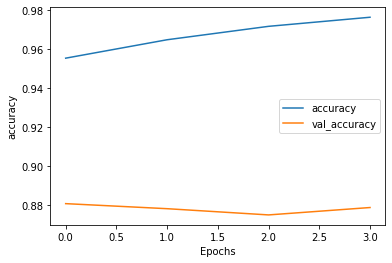

In [ ]:
plot_graphs(history,'accuracy')

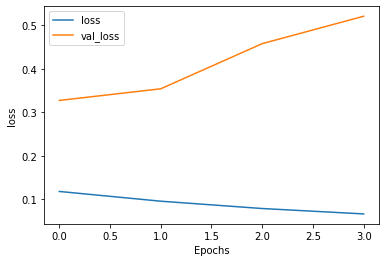

In [ ]:
plot_graphs(history,'loss')

In [ ]:
tf.keras.backend.clear_session()
sa_load=tf.keras.models.load_model('sentiment_analysis.hdf5',compile=False)

In [ ]:
print(sa_load)

In [ ]:
def pad_to_size(vec,size):
  zeros=[0]*(size-len(vec))
  vec.extend(zeros)
  return vec

In [ ]:
def predict_fn(pred_text):
  encoded_pred_text=encoder.encode(pred_text)
  print(encoded_pred_text)
  encoded_pred_text=pad_to_size(encoded_pred_text,32)
  print(encoded_pred_text)
  encoded_pred_text=tf.cast(encoded_pred_text,tf.float32)
  predictions=sa_load.predict(tf.expand_dims(encoded_pred_text,0))

  return predictions

In [ ]:
pred_text=('color and dial not as expected.Shipping was not better as well')
predictions=predict_fn(pred_text)
print(predictions)

[20854, 73168, 35602, 64003, 51010, 54165, 6528, 14502, 64003, 63437, 51010, 51731]
[20854, 73168, 35602, 64003, 51010, 54165, 6528, 14502, 64003, 63437, 51010, 51731, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-1.0821303]]


In [ ]:
pred_text=('The watch is very bad.Not expected this ')
predictions=predict_fn(pred_text)
print(predictions)

[70817, 26597, 43948, 40475, 2137, 12989, 54165, 44370]
[70817, 26597, 43948, 40475, 2137, 12989, 54165, 44370, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-3.5582805]]


In [ ]:
pred_text=('cool product,i like it')
predictions=predict_fn(pred_text)
print(predictions)

[5260, 34120, 53016, 14749, 23883]
[5260, 34120, 53016, 14749, 23883, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[3.134014]]


In [ ]:
pred_text=('good quality and nice packing')
predictions=predict_fn(pred_text)
print(predictions)

[43032, 37235, 73168, 61028, 13867]
[43032, 37235, 73168, 61028, 13867, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[2.774035]]


In [ ]:
print(tf.distribute.get_strategy())

In [ ]:
%reload_ext tensorboard